In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix


In [2]:
df_bd = pd.read_csv('DiaBD_A Diabetes Dataset for Enhanced Risk Analysis and Research in Bangladesh.csv')
df_iq = pd.read_csv('Dataset of Diabetes .csv')

In [3]:
df_iq['source_country'] = 'Iraq'
df_bd['source_country'] = 'Bangladesh'

In [4]:
df_iq.rename(columns={
    'AGE': 'age',
    'Gender': 'gender',
    'BMI': 'bmi',
    'HbA1c': 'hba1c',
    'Chol': 'cholesterol',
    'CLASS': 'diabetic'
},inplace=True)

In [5]:
iraq_cols = set(df_iq.columns)
bd_cols = set(df_bd.columns)
missing_in_bd = iraq_cols - bd_cols
missing_in_iraq = bd_cols - iraq_cols

In [6]:
for col in missing_in_bd:
    df_bd[col] = None

In [7]:
for col in missing_in_iraq:
    df_iq[col] = None

In [8]:
df_bd = df_bd[df_iq.columns]

In [9]:
merged_df = pd.concat([df_iq, df_bd], ignore_index=True)

In [10]:
merged_df.head()

,ID,No_Pation,gender,age,Urea,Cr,hba1c,cholesterol,TG,HDL,...,stroke,family_diabetes,family_hypertension,pulse_rate,height,diastolic_bp,cardiovascular_disease,hypertensive,systolic_bp,glucose
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,...,None,None,None,None,None,None,None,None,None,None
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,...,None,None,None,None,None,None,None,None,None,None
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,...,None,None,None,None,None,None,None,None,None,None
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,...,None,None,None,None,None,None,None,None,None,None
4,504,34223,M,33,7.1,46,4.9,4.9,1,0.8,...,None,None,None,None,None,None,None,None,None,None


In [11]:
print("Column names:", merged_df.columns.tolist())


Column names: ['ID', 'No_Pation', 'gender', 'age', 'Urea', 'Cr', 'hba1c', 'cholesterol', 'TG', 'HDL', 'LDL', 'VLDL', 'bmi', 'diabetic', 'source_country', 'weight', 'stroke', 'family_diabetes', 'family_hypertension', 'pulse_rate', 'height', 'diastolic_bp', 'cardiovascular_disease', 'hypertensive', 'systolic_bp', 'glucose']


In [12]:
missing_summary = merged_df.isnull().sum()
missing_summary = missing_summary[missing_summary > 0].sort_values(ascending=False)
print("Missing values per column:")
print(missing_summary)


Missing values per column:
ID                        5288
VLDL                      5288
No_Pation                 5288
Urea                      5288
Cr                        5288
hba1c                     5288
cholesterol               5288
TG                        5288
HDL                       5288
LDL                       5288
glucose                   1000
systolic_bp               1000
stroke                    1000
family_diabetes           1000
family_hypertension       1000
pulse_rate                1000
height                    1000
diastolic_bp              1000
cardiovascular_disease    1000
hypertensive              1000
weight                    1000
dtype: int64


In [28]:
# fig, ax = plt.subplots(figsize=(10, 8))
# numeric_df = merged_df.select_dtypes(include='number')
# corr_matrix = numeric_df.corr()

# sns.heatmap(corr_matrix, ax=ax, annot=True, cmap='coolwarm', fmt=".2f", square=True)

# ax.set_title("Feature Correlation Heatmap", fontsize=14,)
# plt.tight_layout()

# plt.show()


In [13]:
merged_df.drop(columns=[
    'ID', 'No_Pation', 'Urea', 'Cr', 'VLDL', 'TG', 'HDL', 'LDL',
    'cholesterol', 'height', 'weight', 'pulse_rate',
    'family_diabetes', 'family_hypertension'
], inplace=True)


In [14]:
merged_df.columns

Index(['gender', 'age', 'hba1c', 'bmi', 'diabetic', 'source_country', 'stroke',
       'diastolic_bp', 'cardiovascular_disease', 'hypertensive', 'systolic_bp',
       'glucose'],
      dtype='object')

In [15]:
merged_df.dtypes

gender                     object
age                         int64
hba1c                      object
bmi                       float64
diabetic                   object
source_country             object
stroke                     object
diastolic_bp               object
cardiovascular_disease     object
hypertensive               object
systolic_bp                object
glucose                    object
dtype: object

In [16]:
merged_df['gender'] = merged_df['gender'].str.strip().str.upper()
merged_df['diabetic'] = merged_df['diabetic'].str.strip().str.title()

In [17]:
print("Gender values:", merged_df['gender'].unique())
print("Diabetic values:", merged_df['diabetic'].unique())


Gender values: ['F' 'M' 'FEMALE' 'MALE']
Diabetic values: ['N' 'P' 'Y' 'No' 'Yes']


In [18]:

merged_df['glucose'] = pd.to_numeric(merged_df['glucose'], errors='coerce')
merged_df['hba1c'] = pd.to_numeric(merged_df['hba1c'], errors='coerce')
merged_df['diastolic_bp'] = pd.to_numeric(merged_df['diastolic_bp'], errors='coerce')
merged_df['systolic_bp'] = pd.to_numeric(merged_df['systolic_bp'], errors='coerce')
merged_df['cardiovascular_disease'] = pd.to_numeric(merged_df['cardiovascular_disease'], errors='coerce')
merged_df['hypertensive'] = pd.to_numeric(merged_df['hypertensive'], errors='coerce')
merged_df['stroke'] = pd.to_numeric(merged_df['stroke'], errors='coerce')
merged_df['gender'] = merged_df['gender'].replace({'FEMALE': 'F', 'MALE': 'M'})
merged_df['diabetic'] = merged_df['diabetic'].str.strip().str.upper()
merged_df['diabetic'] = merged_df['diabetic'].replace({'YES': 1, 'NO': 0, 'Y': 1, 'N': 0, 'P': 1})

# merged_df['gender'] = merged_df['gender'].map({'M': 1, 'F': 0})  # binary encoding
# merged_df['diabetic'] = merged_df['diabetic'].map({'Yes': 1, 'No': 0})  # target encoding


In [19]:
merged_df.dtypes

gender                     object
age                         int64
hba1c                     float64
bmi                       float64
diabetic                    int64
source_country             object
stroke                    float64
diastolic_bp              float64
cardiovascular_disease    float64
hypertensive              float64
systolic_bp               float64
glucose                   float64
dtype: object

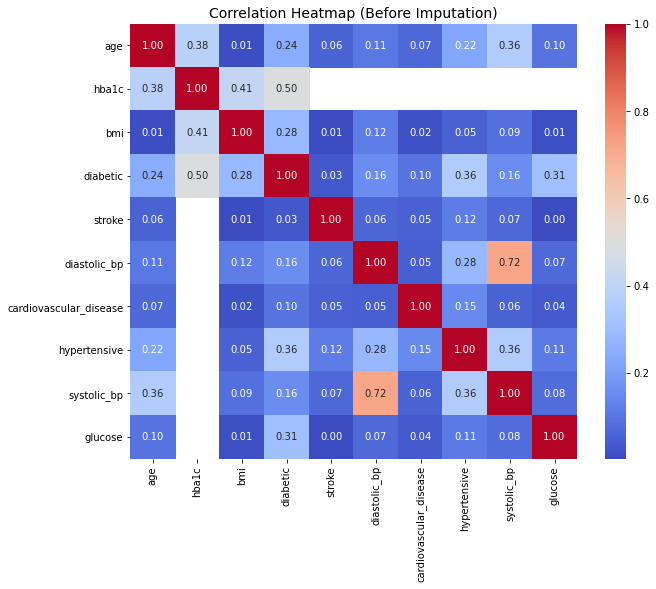

In [24]:
# plt.figure(figsize=(10, 6))
# sns.heatmap(merged_df.isnull(), cbar=False, cmap='viridis')
# plt.title("Missing Values Heatmap (Before Imputation)", fontsize=14)
# plt.show()

numeric_df = merged_df.select_dtypes(include=['number'])
corr_before = numeric_df.corr()
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_before, annot=True, fmt=".2f", cmap="coolwarm", ax=ax)
ax.set_title("Correlation Heatmap (Before Imputation)", fontsize=14)
plt.show()



In [25]:
from sklearn.impute import SimpleImputer

# Define numeric columns with missing values
numeric_cols = ['glucose', 'hba1c', 'diastolic_bp', 'systolic_bp']

# Initialize and apply median imputer
num_imputer = SimpleImputer(strategy='median')
merged_df[numeric_cols] = num_imputer.fit_transform(merged_df[numeric_cols])


In [26]:
# merged_df[binary_cols] = merged_df[binary_cols].replace({None: np.nan})

In [27]:
binary_cols = ['hypertensive', 'stroke', 'cardiovascular_disease']

# Initialize and apply mode imputer
bin_imputer = SimpleImputer(strategy='most_frequent')
merged_df[binary_cols] = bin_imputer.fit_transform(merged_df[binary_cols])


In [28]:
# Check for any remaining missing values
missing_check = merged_df[['glucose', 'hba1c', 'diastolic_bp', 'systolic_bp',
                           'hypertensive', 'stroke', 'cardiovascular_disease']].isnull().sum()

print("Missing values after imputation:")
print(missing_check)


Missing values after imputation:
glucose                   0
hba1c                     0
diastolic_bp              0
systolic_bp               0
hypertensive              0
stroke                    0
cardiovascular_disease    0
dtype: int64


In [29]:
print("Numeric column summaries:")
print(merged_df[['glucose', 'hba1c', 'diastolic_bp', 'systolic_bp']].describe())


Numeric column summaries:
           glucose        hba1c  diastolic_bp  systolic_bp
count  6288.000000  6288.000000   6288.000000  6288.000000
mean      7.463108     8.044714     82.034033   133.361005
std       2.710018     1.015329     11.452440    20.439487
min       0.000000     0.900000     45.000000    62.000000
25%       6.140000     8.000000     75.000000   121.000000
50%       6.930000     8.000000     81.000000   130.000000
75%       7.880000     8.000000     88.000000   143.000000
max      33.460000    16.000000    119.000000   231.000000


In [30]:
median_glucose = merged_df['glucose'].median()
merged_df.loc[merged_df['glucose'] == 0, 'glucose'] = median_glucose


In [31]:
merged_df.dtypes # checking datatypes

gender                     object
age                         int64
hba1c                     float64
bmi                       float64
diabetic                    int64
source_country             object
stroke                    float64
diastolic_bp              float64
cardiovascular_disease    float64
hypertensive              float64
systolic_bp               float64
glucose                   float64
dtype: object

In [32]:
binary_cols = ['cardiovascular_disease', 'stroke', 'hypertensive']
merged_df[binary_cols] = merged_df[binary_cols].astype(int)


In [33]:
merged_df.dtypes # checking after converting

gender                     object
age                         int64
hba1c                     float64
bmi                       float64
diabetic                    int64
source_country             object
stroke                      int32
diastolic_bp              float64
cardiovascular_disease      int32
hypertensive                int32
systolic_bp               float64
glucose                   float64
dtype: object

In [34]:
print("Gender values:", merged_df['gender'].unique())
print("Source country values:", merged_df['source_country'].unique())
print("Diabetic values:", merged_df['diabetic'].unique())


Gender values: ['F' 'M']
Source country values: ['Iraq' 'Bangladesh']
Diabetic values: [0 1]


In [35]:
merged_df['gender'] = (
    merged_df['gender'].astype(str).str.strip().str.upper().map({'M': 1, 'MALE': 1, 'F': 0, 'FEMALE': 0})
)



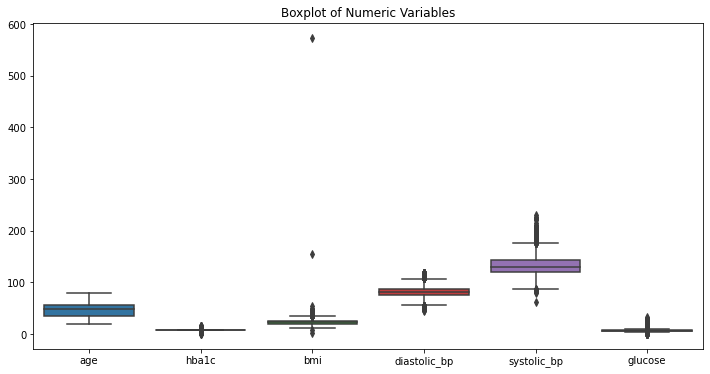

In [40]:
numeric_cols = ['age','hba1c','bmi','diastolic_bp','systolic_bp','glucose']
fig1, ax1 = plt.subplots(figsize=(12, 6))
sns.boxplot(data=merged_df[numeric_cols])
ax1.set_title("Boxplot of Numeric Variables")
plt.show()




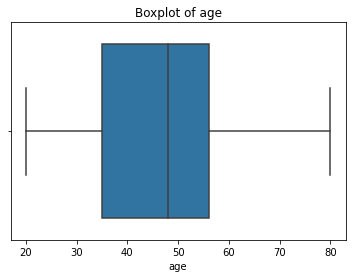

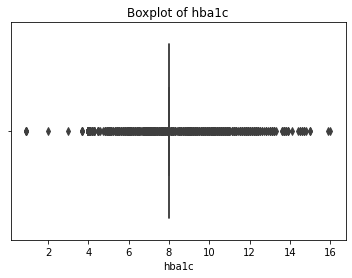

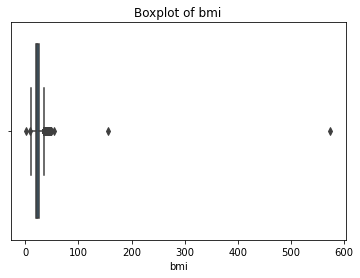

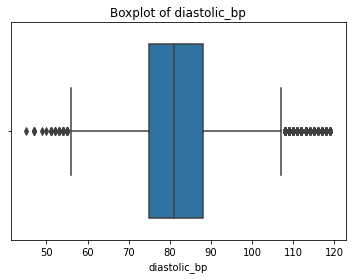

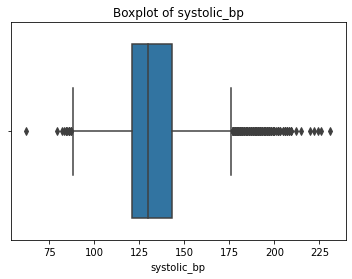

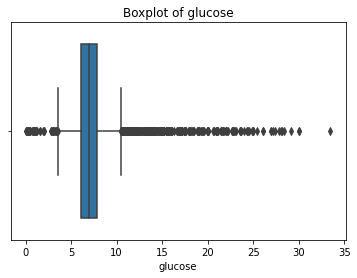

In [42]:
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=merged_df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [43]:
print("Gender values:", merged_df['gender'].unique())
print("Source country values:", merged_df['source_country'].unique())
print("Diabetic values:", merged_df['diabetic'].unique())

Gender values: [0 1]
Source country values: ['Iraq' 'Bangladesh']
Diabetic values: [0 1]


In [44]:
merged_df = merged_df.drop(columns=['source_country'])


In [45]:
merged_df.head()

,gender,age,hba1c,bmi,diabetic,stroke,diastolic_bp,cardiovascular_disease,hypertensive,systolic_bp,glucose
0,0,50,4.9,24.0,0,0,81.0,0,0,130.0,6.93
1,1,26,4.9,23.0,0,0,81.0,0,0,130.0,6.93
2,0,50,4.9,24.0,0,0,81.0,0,0,130.0,6.93
3,0,50,4.9,24.0,0,0,81.0,0,0,130.0,6.93
4,1,33,4.9,21.0,0,0,81.0,0,0,130.0,6.93


In [46]:
X = merged_df.drop(columns=['diabetic'])  # Features
y = merged_df['diabetic']                # Target

In [47]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: diabetic, dtype: int64

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [49]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1258 entries, 1017 to 2403
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  1258 non-null   int64  
 1   age                     1258 non-null   int64  
 2   hba1c                   1258 non-null   float64
 3   bmi                     1258 non-null   float64
 4   stroke                  1258 non-null   int32  
 5   diastolic_bp            1258 non-null   float64
 6   cardiovascular_disease  1258 non-null   int32  
 7   hypertensive            1258 non-null   int32  
 8   systolic_bp             1258 non-null   float64
 9   glucose                 1258 non-null   float64
dtypes: float64(5), int32(3), int64(2)
memory usage: 93.4 KB


In [50]:
continuous_cols = ['age', 'glucose', 'hba1c', 'bmi', 'diastolic_bp', 'systolic_bp']


In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[continuous_cols] = scaler.fit_transform(X_train[continuous_cols])
X_test[continuous_cols] = scaler.transform(X_test[continuous_cols])


<ipython-input-51-97f16f0b954d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[continuous_cols] = scaler.fit_transform(X_train[continuous_cols])
C:\Users\natu\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
<ipython-input-51-97f16f0b954d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [52]:
X_train[continuous_cols].describe()


,age,glucose,hba1c,bmi,diastolic_bp,systolic_bp
count,5.030000e+03,5.030000e+03,5.030000e+03,5.030000e+03,5.030000e+03,5.030000e+03
mean,-2.357900e-16,-2.768936e-16,-5.410213e-16,1.692925e-16,1.159885e-16,-4.836754e-16
std,1.000099e+00,1.000099e+00,1.000099e+00,1.000099e+00,1.000099e+00,1.000099e+00
min,-2.045054e+00,-2.704923e+00,-7.007919e+00,-2.374462e+00,-3.232432e+00,-2.657644e+00
25%,-9.051948e-01,-4.881371e-01,-3.812669e-02,-3.658751e-01,-6.135956e-01,-6.023312e-01
50%,6.692613e-03,-2.010452e-01,-3.812669e-02,-1.198390e-01,-8.982834e-02,-1.619072e-01
75%,6.906082e-01,1.587281e-01,-3.812669e-02,2.534570e-01,5.212335e-01,4.742609e-01
max,2.514383e+00,9.440155e+00,7.815160e+00,5.838265e+01,3.227364e+00,4.780630e+00


In [53]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [54]:
y_pred = model.predict(X_test)


In [57]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



Accuracy: 0.8831478537360891
Precision: 0.8258064516129032
Recall: 0.5161290322580645
F1 Score: 0.6352357320099256
Confusion Matrix:
 [[983  27]
 [120 128]]


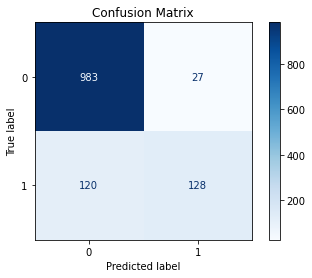

In [63]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues) 
plt.title("Confusion Matrix")
plt.show()

In [64]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [71]:
y_rf_pred = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_rf_pred))
print("Precision:", precision_score(y_test, y_rf_pred))
print("Recall:", recall_score(y_test, y_rf_pred))
print("F1 Score:", f1_score(y_test, y_rf_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_rf_pred))


Accuracy: 0.9570747217806042
Precision: 0.9663461538461539
Recall: 0.8104838709677419
F1 Score: 0.881578947368421
Confusion Matrix:
 [[1003    7]
 [  47  201]]


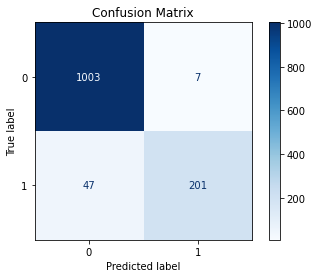

In [73]:
cm_rf = confusion_matrix(y_test, y_rf_pred)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=model.classes_)
disp1.plot(cmap=plt.cm.Blues) 
plt.title("Confusion Matrix")
plt.show()